<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW1problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 1.2597 - acc: 0.7049 - val_loss: 0.8116 - val_acc: 0.8264
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.7148 - acc: 0.8385 - val_loss: 0.6095 - val_acc: 0.8589
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5879 - acc: 0.8578 - val_loss: 0.5282 - val_acc: 0.8717
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.5267 - acc: 0.8667 - val_loss: 0.4822 - val_acc: 0.8820
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.4893 - acc: 0.8736 - val_loss: 0.4520 - val_acc: 0.8856
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.4634 - acc: 0.8783 - val_loss: 0.4306 - val_acc: 0.8901
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.4443 - acc: 0.8821 - val_loss: 0.4141 - val_acc

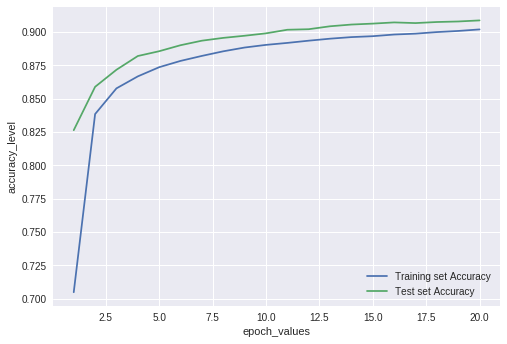

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
#Loading the MNIST data and classifying data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
input_dim = 784
output_dim = 10
total_classes = 10
batch_size = 128
epoch_value = 20
#Now we need to train and test the model first and then we need to reshape it
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)
model = Sequential()
model.add(Dense(output_dim,input_dim = input_dim, activation='softmax'))#calling the softmax function from keras which acts as activation function for our problem
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])#calling sgd, categorical cross entropy functions and accuracy from keras
history = model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = epoch_value,verbose=1, validation_data=(X_test, Y_test))#Training the test set and train set using keras
score = model.evaluate(X_test, Y_test, verbose=0)#evaluating the results for the test set
print('Test score is', score[0])
print('Test accuracy is', score[1]*100,'%')#printing the accuracy
print(history.history)
print(score)

#plotting in the graph
plotaccuracy = plt.plot(range(1,21),history.history['acc'],range(1,21),history.history['val_acc'])
plt.xlabel('epoch_values')
plt.ylabel('accuracy_level')
plt.legend(('Training set Accuracy','Test set Accuracy'))
plt.show(plotaccuracy)